# **2.	Problem Statement**

A financial institution wants to predict whether a customer will default on a loan before approving it. Early identification of risky customers helps reduce financial loss.  
You are working as a Machine Learning Analyst and must build a classification model using the K-Nearest Neighbors (KNN) algorithm to predict loan default.  

This case introduces:
- Mixed feature types
- Financial risk interpretation
- Class imbalance awareness

| Age | AnnualIncome (lakhs) | CreditScore (300–900) | LoanAmount (lakhs) | LoanTerm (years) | EmploymentType | Loan (Yes/No) |
|-----|---------------------|----------------------|--------------------|------------------|----------------|---------------|
| 28  | 6.5                 | 720                  | 5                  | 5                | Salaried       | 0             |
| 45  | 12                  | 680                  | 10                 | 10               | Self-Employed  | 1             |
| 35  | 8                   | 750                  | 6                  | 7                | Salaried       | 0             |
| 50  | 15                  | 640                  | 12                 | 15               | Self-Employed  | 1             |
| 30  | 7                   | 710                  | 5                  | 5                | Salaried       | 0             |
| 42  | 10                  | 660                  | 9                  | 10               | Salaried       | 1             |
| 26  | 5.5                 | 730                  | 4                  | 4                | Salaried       | 0             |
| 48  | 14                  | 650                  | 11                 | 12               | Self-Employed  | 1             |
| 38  | 9                   | 700                  | 7                  | 8                | Salaried       | 0             |
| 55  | 16                  | 620                  | 13                 | 15               | Self-Employed  | 1             |


In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [90]:
data = {
    "Age": [28, 45, 35, 50, 30, 42, 26, 48, 38, 55],
    "AnnualIncome": [6.5, 12, 8, 15, 7, 10, 5.5, 14, 9, 16],
    "CreditScore": [720, 680, 750, 640, 710, 660, 730, 650, 700, 620],
    "LoanAmount": [5, 10, 6, 12, 5, 9, 4, 11, 7, 13],
    "LoanTerm": [5, 10, 7, 15, 5, 10, 4, 12, 8, 15],
    "EmploymentType": [
        "Salaried", "Self-Employed", "Salaried",
        "Self-Employed", "Salaried", "Salaried",
        "Salaried", "Self-Employed", "Salaried",
        "Self-Employed"
    ],
    "Loan": [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
}

df = pd.DataFrame(data)
df

,Age,AnnualIncome,CreditScore,LoanAmount,LoanTerm,EmploymentType,Loan
0,28,6.5,720,5,5,Salaried,0
1,45,12.0,680,10,10,Self-Employed,1
2,35,8.0,750,6,7,Salaried,0
3,50,15.0,640,12,15,Self-Employed,1
4,30,7.0,710,5,5,Salaried,0
5,42,10.0,660,9,10,Salaried,1
6,26,5.5,730,4,4,Salaried,0
7,48,14.0,650,11,12,Self-Employed,1
8,38,9.0,700,7,8,Salaried,0
9,55,16.0,620,13,15,Self-Employed,1


In [91]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

scaler = StandardScaler()
label_encoder = LabelEncoder()

df['EmploymentType'] = label_encoder.fit_transform(df['EmploymentType'])

cols = ['Age', 'AnnualIncome', 'CreditScore', 'LoanAmount', 'LoanTerm']

scaled_features = scaler.fit_transform(df[cols])
df_scaled = pd.DataFrame(scaled_features, columns=cols)

df_feat = pd.concat([df_scaled, df[['EmploymentType']]], axis=1)
df_feat

,Age,AnnualIncome,CreditScore,LoanAmount,LoanTerm,EmploymentType
0,-1.242924,-1.067989,0.838548,-1.045953,-1.077084,0
1,0.563034,0.477785,-0.147979,0.588348,0.236433,1
2,-0.499294,-0.646414,1.578444,-0.719092,-0.551677,0
3,1.094198,1.320934,-1.134506,1.242069,1.549950,1
4,-1.030458,-0.927464,0.591916,-1.045953,-1.077084,0
5,0.244335,-0.084315,-0.641243,0.261488,0.236433,0
6,-1.455389,-1.349039,1.085180,-1.372813,-1.339788,0
7,0.881732,1.039884,-0.887875,0.915209,0.761840,1
8,-0.180596,-0.365365,0.345285,-0.392232,-0.288974,0
9,1.625362,1.601983,-1.627770,1.568929,1.549950,1


In [92]:
from numpy.random import seed
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


X_train, X_test, y_train, y_test = train_test_split(df_feat, df['Loan'], test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(f"Test Accuracy (k=1): {accuracy_score(y_test, y_pred):.2f}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test Accuracy (k=1): 1.00
[[1 0]
 [0 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



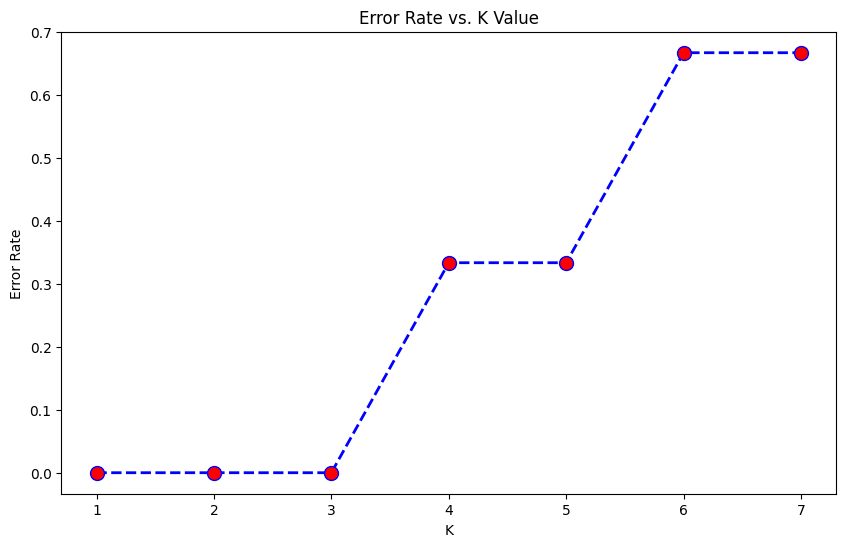

In [93]:
### Elbow
k_range = range(1, len(X_train) + 1)
error_rate = []

for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10, 6))
plt.plot(list(k_range), error_rate, color='blue', linewidth=2,
         linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [94]:
best_knn = KNeighborsClassifier(n_neighbors=3)
best_knn.fit(X_train, y_train)

y_pred_best = best_knn.predict(X_test)

In [95]:
print(f"Test Accuracy (k=3): {accuracy_score(y_test, y_pred_best):.2f}")
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Test Accuracy (k=3): 1.00
[[1 0]
 [0 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



# This shows that k=1 is identifical with k=3, hence k=1 with KNN should ideally be sufficient for the model